In [2]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries inladen
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.covariance import EllipticEnvelope
# Voor statistische data visualisatie
import seaborn as sns; sns.set(color_codes=True)

In [3]:
# Inlezen van de dataset
dataset = pd.read_csv('boston_housing.csv')

In [4]:
# Toon de eerste rijen van de dataset
dataset.head(10)


CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421   78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185   61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998   45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147   54.200001  6.0622    3  222   
5  0.02985   0.0   2.18     0  0.458  6.430   58.700001  6.0622    3  222   
6  0.08829  12.5   7.87     0  0.524  6.012   66.599998  5.5605    5  311   
7  0.14455  12.5   7.87     0  0.524  6.172   96.099998  5.9505    5  311   
8  0.21124  12.5   7.87     0  0.524  5.631  100.000000  6.0821    5  311   
9  0.17004  12.5   7.87     0  0.524  6.004   85.900002  6.5921    5  311   

          PT           B  LSTAT       Price  
0  15.300000  396.899994   4.98  504.000000  
1  17.799999  396.899994   9.14  453.600008  
2  17.799999  392.829987   4.03  728.700016  
3  18.700001  394.630005   2.94  701.400032  
4  18.700001  396.899994   5.33  760.200016  
5  18.700001  394.119995   5.21  602.700016  
6  15.200000  395.600006  12.43  480.899992  
7  15.200000  396.899994  19.15  569.100008  
8  15.200000  386.630005  29.93  346.500000  
9  15.200000  386.709992  17.10  396.899992

### Beschrijving van de verschillende features:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $\$10,000$
- PTRATIO - pupil-teacher ratio by town
- B - $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - % lower status of the population
# Verwijder de CHAS waarden (overal 0) is een dummy variabele
dataset.drop('CHAS', axis=1, inplace=True) #inplace vervangt huidige dataframe en axis=1 -> kolom (axis 0 is een rij)- Price - Median value of owner-occupied homes in $1000's

In [22]:
# Verwijder de CHAS waarden (overal 0) is een dummy variabele
dataset.drop('CHAS', axis=1, inplace=True) #inplace vervangt huidige dataframe en axis=1 -> kolom (axis 0 is een rij)

In [23]:
# Verwijder de alle rijen waarin uitschieters staan. 
# Uitschieters worden berekend via de 3 sigma regel. 
# 3 sigma -> 99,7 procent van de gegevens ligt binnen de -3 sigma -> + 3 sigma

from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  441.000000  441.000000  441.000000  441.000000  441.000000  441.000000   
mean     2.649013    9.988662   10.759479    0.547575    6.265785   67.632200   
std      6.273766   19.941189    6.749778    0.112896    0.685393   27.997824   
min      0.006320    0.000000    1.250000    0.385000    3.561000    2.900000   
25%      0.081870    0.000000    5.190000    0.449000    5.877000   45.000000   
50%      0.217190    0.000000    8.140000    0.524000    6.172000   74.500000   
75%      1.656600   12.500000   18.100000    0.609000    6.590000   93.599998   
max     67.920799   80.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX          PT           B       LSTAT  \
count  441.000000  441.000000  441.000000  441.000000  441.000000  441.000000   
mean     3.851895    8.478458  389.045351   18.387302  375.393853   12.165329   
std      2.054524    8.000859  158.293650    2.164533   49.296266    6.632866   
min      1.169100    1.000000  188.000000   12.600000   83.449997    1.730000   
25%      2.122200    4.000000  277.000000   17.000000  377.730011    6.920000   
50%      3.375100    5.000000  311.000000   18.700001  392.200012   10.740000   
75%      5.231100    8.000000  432.000000   20.200001  396.899994   15.940000   
max     10.710300   24.000000  711.000000   22.000000  396.899994   31.990000   

             Price  
count   441.000000  
mean    478.785715  
std     180.278859  
min     105.000000  
25%     380.100008  
50%     455.700016  
75%     525.000000  
max    1050.000000

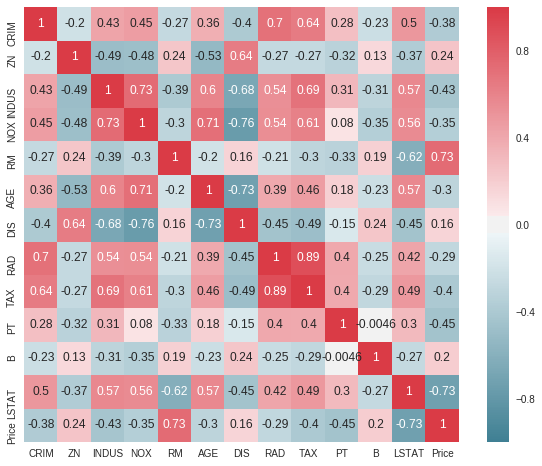

In [6]:
# Lineaire correlatie tussen de features

dataset.corr()

# Visualiseer de onderlinge correlatiecoëfficiënten
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

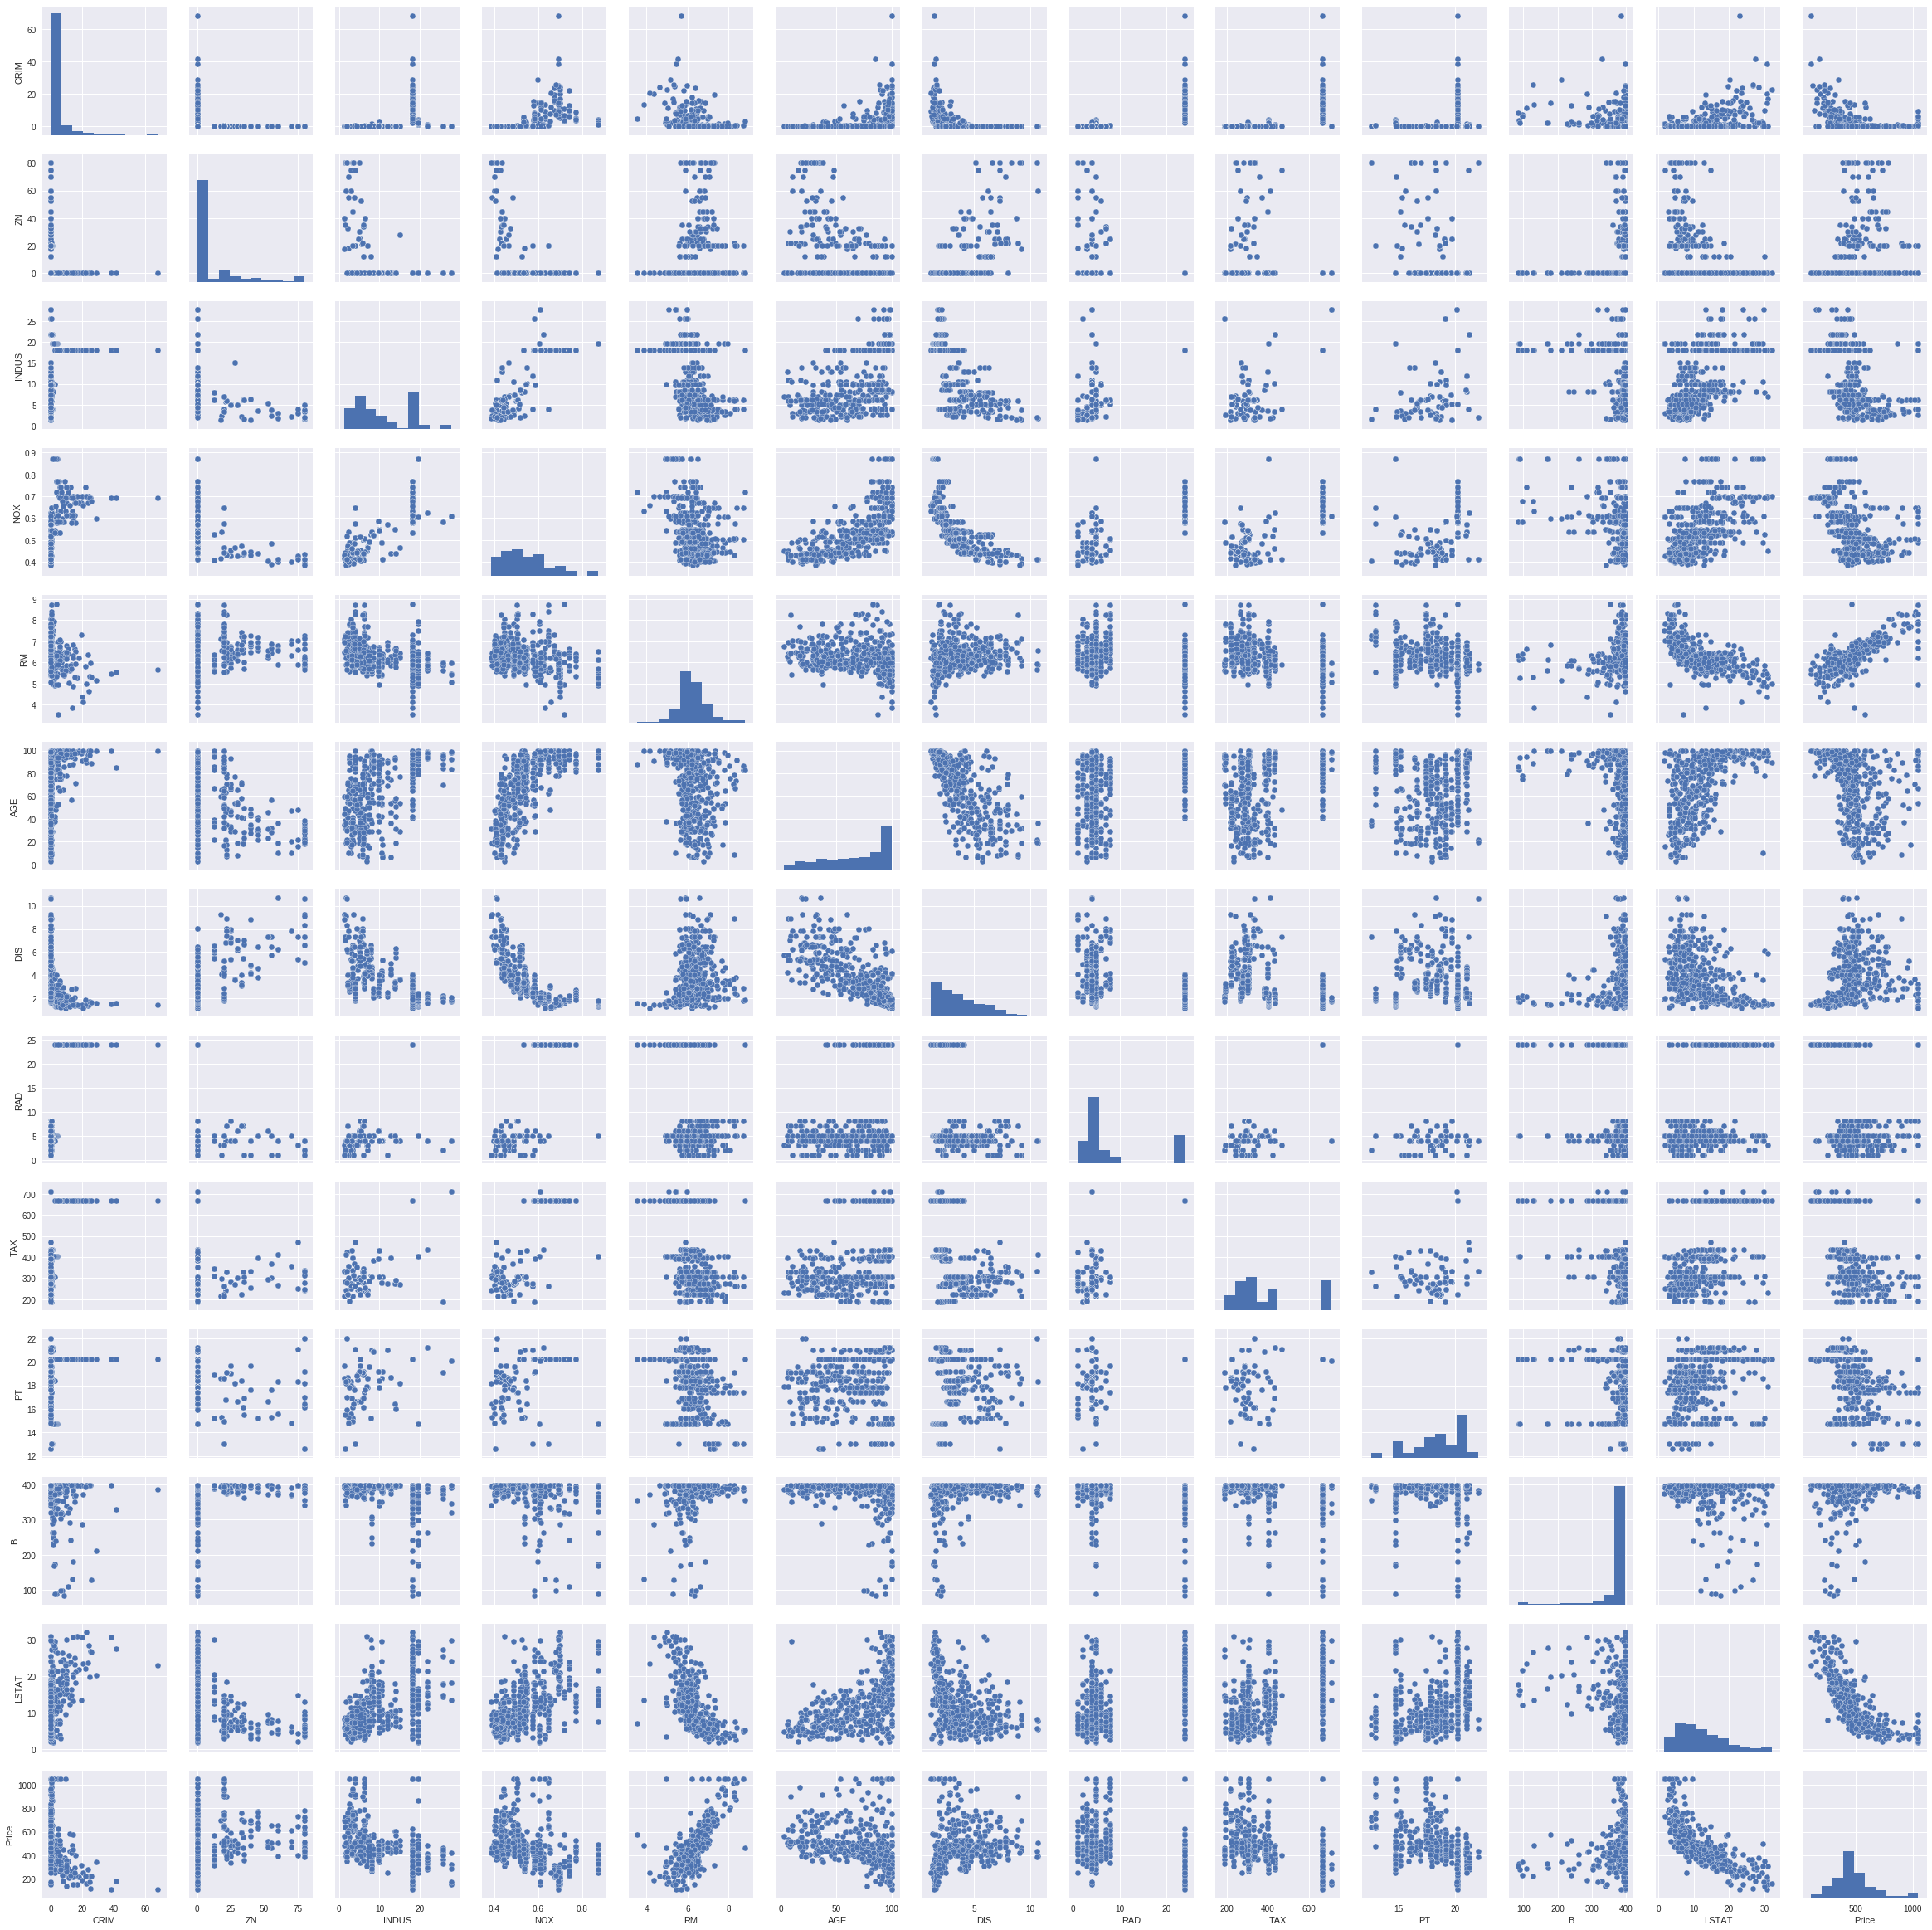

In [7]:
# pairplot

sns.pairplot(dataset);

In [9]:
# Dataset opsplitsen in training en test set

features = list(dataset.columns[:dataset.columns.size-1])
print(features)
X = dataset[features].values 
y= dataset['Price'].values
print(X)
print(X.shape)

# alternatief voor het opsplitsen in training en test set
#y = dataset.Price.values
#X = dataset.drop(['Price'],axis=1)


print(y)
# Nog een alternatief  voor het opsplitsen in training en test set:
# X = dataset.ix[:,0:dataset.columns.size-1].copy()    
# Y = dataset.ix[:,dataset.columns.size-1:dataset.columns.size].copy()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT']
[[6.32000000e-03 1.80000000e+01 2.30999994e+00 ... 1.53000002e+01
  3.96899994e+02 4.98000002e+00]
 [2.73100010e-02 0.00000000e+00 7.07000017e+00 ... 1.77999992e+01
  3.96899994e+02 9.14000034e+00]
 [2.72900000e-02 0.00000000e+00 7.07000017e+00 ... 1.77999992e+01
  3.92829987e+02 4.03000021e+00]
 ...
 [6.07599990e-02 0.00000000e+00 1.19300003e+01 ... 2.10000000e+01
  3.96899994e+02 5.63999987e+00]
 [1.09590001e-01 0.00000000e+00 1.19300003e+01 ... 2.10000000e+01
  3.93450012e+02 6.48000002e+00]
 [4.74100000e-02 0.00000000e+00 1.19300003e+01 ... 2.10000000e+01
  3.96899994e+02 7.88000011e+00]]
(506, 13)
[ 504.          453.60000798  728.70001596  701.40003213  760.20001596
  602.70001596  480.89999202  569.10000798  346.5         396.89999202
  315.          396.89999202  455.70001596  428.39999202  382.20001596
  417.89999202  485.10000798  367.5         424.20001596  382.20001596
  285.6000079

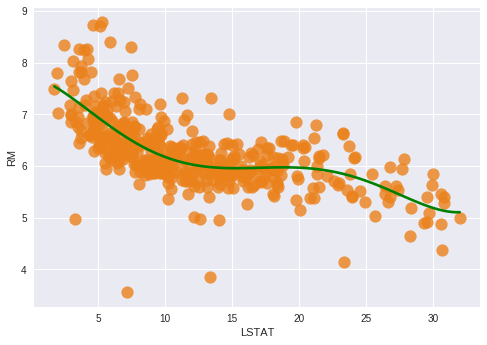

In [9]:
sns.regplot(x= dataset.LSTAT,y=dataset.RM,color='#EB811B',line_kws={'color': 'green'},ci=None,order=5,scatter_kws={'s':150},truncate=True)


In [25]:
# Opdelen in training en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
# initialiseren en trainen van het regressiemodel
lregmodel = linear_model.LinearRegression()
lregmodel.fit(X_train,y_train)

# Coëfficiënten en intercept van het lineair regressiemodel
print('coeffs: ',lregmodel.coef_)
print('intercept', lregmodel.intercept_)

coeffs:  [-3.56141289e+00  4.05479295e-01  8.14080284e-01 -2.70514977e+02
  8.96450415e+01 -3.02997261e-01 -2.77339444e+01  7.47151897e+00
 -2.92233040e-01 -1.61741146e+01  7.62044683e-02 -1.17962045e+01]
intercept 650.6520225171147


In [27]:
# Voorspel de prijs van een huis met 
#CRIM  & ZN  & INDUS & NOX  & RM   & AGE    & DIS & RAD & TAX   & PT     & B      & LSTAT
# 0.11 & 0  &  12.03 & 0.57 & 6.80 & 89.30 & 2.39 & 1   & 273  & 21.00  & 393.45 & 6.48

house =np.array([0.11, 0,12.03,0.57,6.80,89.30,2.39 ,1 , 273 , 21.00 , 393.45 , 6.48])

price = lregmodel.predict(house.reshape(1,-1))
#print(house.reshape(1,-1).shape)
print('De prijs van het huis bedraagt: ' , price)

De prijs van het huis bedraagt:  [563.68335073]


In [28]:
# Evaluatie van het model

y_predicted = lregmodel.predict(X_test)

## Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

## Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

## coefficient of determination = r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_predicted)

print('r2 score = ',r2)

### alternatieve manier voor het bepalen van de r2 score
r2 = lregmodel.score(X_test,y_test)
print('r2 score = ', r2)

MAE =  64.0090867585709
MSE =  7803.893327394465
r2 score =  0.7542542349171305
r2 score =  0.7542542349171305


## Modeloptimalisatie en feature engineering

In [29]:
# Normalisatie
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# L2 regularisatie toepassen via Ridge regression

lregmodel = Ridge(alpha=0.1,tol=0.0001,fit_intercept=True)
lregmodel.fit(X_train,y_train)
lregmodel.score(X_test,y_test)

0.7543015065295565

In [32]:
# L1 regularisatie toepassen via Lasso regression

lregmodel = Lasso(alpha=0.1,tol=0.0001,fit_intercept=True)
lregmodel.fit(X_train,y_train)
lregmodel.score(X_test,y_test)


0.7547909035292226

In [33]:
# toevoegen van extra feature: LSTAT^2 LSTAT^3
dataset2  = dataset.copy()
dataset2.insert(dataset2.columns.size-1,'LSTAT^2',dataset.LSTAT**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^3',dataset.LSTAT**3)
dataset2.insert(dataset2.columns.size-1,'LSTAT*RM',dataset.LSTAT*dataset.RM)
dataset2.insert(dataset2.columns.size-1,'LSTAT*RM^2',dataset.LSTAT*dataset.RM**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^2*RM^2',(dataset.LSTAT**2)*dataset.RM**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT*AGE',dataset.LSTAT*dataset.AGE)
dataset2.insert(dataset2.columns.size-1,'LSTAT*AGE^2',dataset.LSTAT*dataset.AGE**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^2*AGE',(dataset.LSTAT**2)*dataset.AGE)
dataset2.head()

CRIM    ZN  INDUS    NOX     RM        AGE     DIS  RAD  TAX         PT  \
0  0.00632  18.0   2.31  0.538  6.575  65.199997  4.0900    1  296  15.300000   
1  0.02731   0.0   7.07  0.469  6.421  78.900002  4.9671    2  242  17.799999   
2  0.02729   0.0   7.07  0.469  7.185  61.099998  4.9671    2  242  17.799999   
3  0.03237   0.0   2.18  0.458  6.998  45.799999  6.0622    3  222  18.700001   
4  0.06905   0.0   2.18  0.458  7.147  54.200001  6.0622    3  222  18.700001   

      ...      LSTAT    LSTAT^2     LSTAT^3   LSTAT*RM  LSTAT*RM^2  \
0     ...       4.98  24.800400  123.505993  32.743499  215.288501   
1     ...       9.14  83.539606  763.552030  58.687942  376.835277   
2     ...       4.03  16.240902   65.450837  28.955551  208.045634   
3     ...       2.94   8.643600   25.412185  20.574121  143.977701   
4     ...       5.33  28.408899  151.419431  38.093509  272.254300   

   LSTAT^2*RM^2   LSTAT*AGE   LSTAT*AGE^2  LSTAT^2*AGE       Price  
0   1072.136738  324.695986  21170.177300  1616.986017  504.000000  
1   3444.274564  721.146041  56898.423742  6591.275063  453.600008  
2    838.423950  246.233007  15044.836331   992.319069  728.700016  
3    423.294448  134.652000   6167.061515   395.876889  701.400032  
4   1451.115396  288.886000  15657.621416  1539.762358  760.200016  

[5 rows x 21 columns]

In [34]:
features = list(dataset2.columns[:dataset2.columns.size-1])
print(features)
X = dataset2[features].values 
y= dataset2['Price'].values
# splits op in training set en test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=0)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT*RM', 'LSTAT*RM^2', 'LSTAT^2*RM^2', 'LSTAT*AGE', 'LSTAT*AGE^2', 'LSTAT^2*AGE']


In [35]:
# trainen en testen van het model
lregmodel2 = linear_model.LinearRegression()
lregmodel2.fit(X_train_2,y_train_2)

r2score_2 = lregmodel2.score(X_test_2,y_test_2)
print(r2score_2)


0.8501526177858948


In [41]:
# met L2 regularisatie via Ridge regression
lregmodel2 = Ridge(alpha=1,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
lregmodel2.score(X_test_2,y_test_2)


0.8433943179091207

In [43]:
# met L1 regularisatie via Lasso regression
lregmodel2 = Lasso(alpha=0.5,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
lregmodel2.score(X_test_2,y_test_2)


/home/wouter/tensoflow-gpu/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8437113338085344

In [67]:
# Via KernelRidge met een polynomial kernel

from sklearn.kernel_ridge import KernelRidge

lregmodel3 = KernelRidge(alpha=10, degree=3, gamma=None, kernel='polynomial')
lregmodel3.fit(X_train,y_train)

y_predicted = lregmodel3.predict(X_train)
r2 = r2_score(y_train,y_predicted)

print(r2)




0.8565003675971781


In [71]:
# Automatisch toevoegen van hogere orde features

from sklearn.preprocessing import PolynomialFeatures


# Aanmaken van de hogere orde features
graad = 3

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)


# met L2 regularisatie via Ridge regression
lregmodel_poly = Ridge(alpha=100,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score via L2: ',lregmodel_poly.score(X_test_poly,y_test))

# met L1 regularisatie via Lasso regression
lregmodel_poly = Lasso(alpha=1,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)      
  
      
print('R2 score via L1: ',lregmodel_poly.score(X_test_poly,y_test))
      


dimensie van X_train_poly:  (295, 455)
dimensie van X_test_poly:  (146, 455)
R2 score via L2:  0.8252522817302393
R2 score via L1:  0.8472290492238503


/home/wouter/tensoflow-gpu/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))